<a href="https://colab.research.google.com/github/JairAmaro/arbol_de_decision/blob/main/Modelo_%C3%81rbol_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*MODELO:* Árbol de decisión




In [1]:
!git clone https://github.com/JairAmaro/arbol_de_decision.git

Cloning into 'arbol_de_decision'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#Cargar los datos
data = pd.read_excel("/content/arbol_de_decision/Cardiovascular diseases dataset (clean).xlsx")

In [5]:
#Mostrar los datos
data.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [6]:
data['CARDIO_DISEASE'].unique() #Veamos con que lementos esta asociado nuestra variable objetivo

array([0, 1])

In [7]:
#Tomamos la variable objetivo
#Contamos los 1 y 0 el cual corresponde que tiene problemas cardiabasculares y los que no
data['CARDIO_DISEASE'].value_counts()

0    34742
1    34041
Name: CARDIO_DISEASE, dtype: int64

In [8]:
#Cramos una dt llamado X pero quitando la variable CARDIO_DISEASE
#Quitamos esta variablo por que nos interesa tener nuestas variables explecitas
X = data.drop('CARDIO_DISEASE', axis=1)
X.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
0,50,2,168,62,110,80,1,1,0,0,1
1,55,1,156,85,140,90,3,1,0,0,1
2,52,1,165,64,130,70,3,1,0,0,0
3,48,2,169,82,150,100,1,1,0,0,1
4,48,1,156,56,100,60,1,1,0,0,0


In [9]:
#Nombramos una data pero ahora con Y para poder tamaño de muestras (variables explicativas y objetivo)
Y = data['CARDIO_DISEASE']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

In [11]:
X_train
#usando la función de división de prueba de tren

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
487,62,1,161,62,140,80,2,2,0,0,1
59698,60,2,167,58,120,80,3,1,1,0,1
48860,56,1,161,63,140,80,1,1,0,0,1
24340,60,1,156,68,120,80,1,1,0,0,1
7722,54,1,152,73,130,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
55985,50,1,163,73,130,100,2,1,0,0,1
32399,58,1,160,59,120,80,1,1,0,0,0
60620,54,1,156,53,120,80,3,3,0,0,1
34086,46,1,154,50,110,70,1,1,0,0,1


In [12]:
X_test

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
24749,64,1,176,112,120,80,1,1,0,0,1
33004,40,1,153,57,100,70,1,1,0,0,1
62379,56,2,156,67,140,90,1,1,1,0,0
42270,60,1,165,65,120,79,1,1,0,0,0
18794,64,1,158,59,130,90,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22775,42,2,175,95,120,80,1,1,0,0,1
42238,58,1,178,70,120,80,1,1,0,0,1
6005,51,1,153,88,120,80,1,1,0,0,1
4386,48,1,168,85,120,90,3,1,0,0,0


In [13]:
#Las dimensiones de nuestro df
X.shape


(68783, 11)

In [14]:
from sklearn.tree import plot_tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_depth = 3)
#si quitamos el max nos imprimiria todo el arbol por lo cual recordadno que python cuenta desde el cero entonces al poner la limitacion de 3 solo 
#imprimiria solo los 4 primeros cuadros dondicionales 

In [17]:
#Tomaremos el modelo pero respecto las variables explicativas con la objetivo 
#usamos la sentencia model donde guardamos nuestro arbol 
model.fit(X  , Y  ) 

DecisionTreeClassifier(max_depth=3)

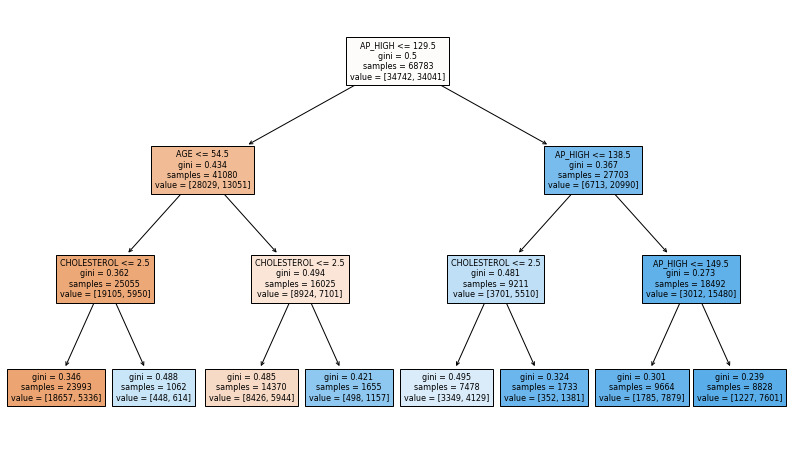

In [18]:
plt.figure(figsize = (14,8))
plot_tree(decision_tree = model, feature_names = X.columns, filled = True, fontsize = 8);
#Ploteamos solo es tamaño de nuestro plot con nuestra variable X creada

In [19]:
#calcular prediccion 
a = X.sample()

In [22]:
#Hacemos una simulacion donde tomamos a un indiviuo el cual analizaremos con el arbol de desicion 
a

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
37167,42,2,169,67,120,80,1,1,0,0,1


In [26]:
#Cuantas personas 
#Este resultado se obitne leyendo el arbol de desicion 
4129/7478

0.5521529820807702

In [27]:
#La probabilidad que tenga problemas cardio
#El cual confirmaos que es verdadero si obtenemos la probabilidad y el complemneto 
model.predict_proba(a)

array([[0.7776018, 0.2223982]])

Cuando llamamos a la variable 'a' es hacer una una prueba, es decir cuantos tiene las mismas caracteristicas que tengan edad 62, sea mujer, cuanda precion tiene si tiene colesterol, glucosa, si fuma, si bebe alcohol, etc \\Entonces


In [28]:
y_pred = model.predict(X)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

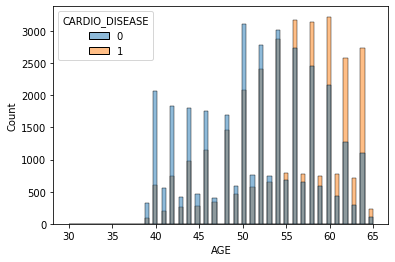

In [29]:
#interpretar
import seaborn as sns

sns.histplot(x = data.AGE,hue = data.CARDIO_DISEASE)


In [30]:
#Como se analiza 
data['pred'] = y_pred

In [31]:
data.sample(10)[['CARDIO_DISEASE','pred']]

,CARDIO_DISEASE,pred
46503,0,1
17118,1,1
4213,0,0
53787,1,0
20308,0,0
1880,0,1
50959,0,0
25900,1,1
30118,0,0
33234,0,1


In [32]:
(data['CARDIO_DISEASE'] == data['pred']).sum()

49844

In [33]:
(data['CARDIO_DISEASE'] == data['pred']).mean()

0.7246558015788785

In [34]:
(data['CARDIO_DISEASE'] == data['pred']).sum()/68783

0.7246558015788785

Text(0.5, 1.0, 'Mapa de calor para nuestro dataframe')

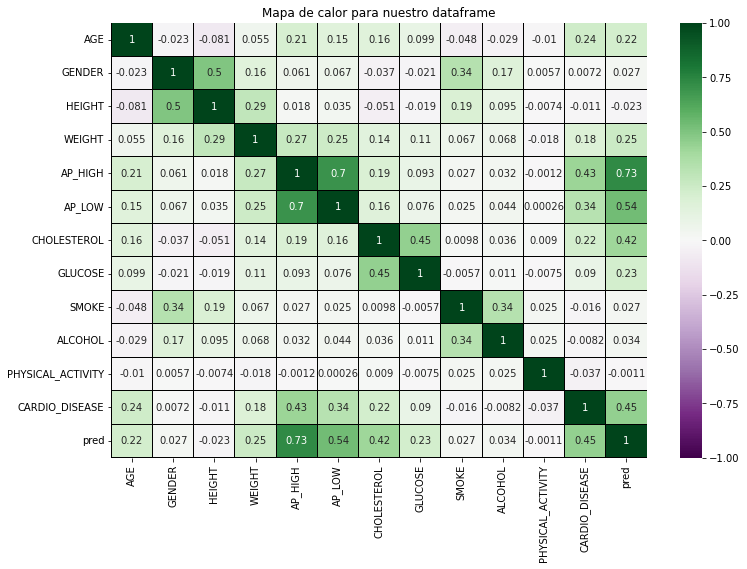

In [35]:
correlacion = data.corr()

plt.figure(figsize=(12, 8))
grafica_calor = sns.heatmap(correlacion,
                            annot = True,
                            linewidths = 0.01,
                            linecolor = 'black',
                            vmin = -1,  
                            cmap = 'PRGn'
                            )
plt.title('Mapa de calor para nuestro dataframe')

# annot siendo verdadero pondra el valor dentro de cada cuadro
# linewidth es poner un color de line con su tamaño, cmap es el color en combinaciones
#vmin valor con menor correlacion